In [12]:
min_datetime = df['pickup_datetime'].min()
max_datetime = df['pickup_datetime'].max()
total_rows = len(df)
print("Datetime Range: From", min_datetime, "to", max_datetime)
print("Total Rows:", total_rows)



Datetime Range: From 2013-01-01 00:00:00 to 2013-01-31 23:59:59
Total Rows: 14776615


In [13]:
field_names = df.columns
field_descriptions = {
    "medallion": "A unique identifier for the taxi",
    "hack_license": "A unique identifier for the taxi driver",
    "pickup_datetime": "Date and time of pickup",
    "dropoff_datetime": "Date and time of dropoff",
    
}
print("Field Names:")
print(field_names)
print("\nField Descriptions:")
for field, description in field_descriptions.items():
    print(field, ":", description)


Field Names:
Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'trip_time_in_secs', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'hour'],
      dtype='object')

Field Descriptions:
medallion : A unique identifier for the taxi
hack_license : A unique identifier for the taxi driver
pickup_datetime : Date and time of pickup
dropoff_datetime : Date and time of dropoff


In [14]:
sample_data = df.head()
print("Sample Data:")
print(sample_data)


Sample Data:
                          medallion                      hack_license  \
0  89D227B655E5C82AECF13C3F540D4CF4  BA96DE419E711691B9445D6A6307C170   
1  0BD7C8F5BA12B88E0B67BED28BEA73D8  9FD8F69F0804BDB5549F40E9DA1BE472   
2  0BD7C8F5BA12B88E0B67BED28BEA73D8  9FD8F69F0804BDB5549F40E9DA1BE472   
3  DFD2202EE08F7A8DC9A57B02ACB81FE2  51EE87E3205C985EF8431D850C786310   
4  DFD2202EE08F7A8DC9A57B02ACB81FE2  51EE87E3205C985EF8431D850C786310   

  vendor_id  rate_code store_and_fwd_flag     pickup_datetime  \
0       CMT          1                  N 2013-01-01 15:11:48   
1       CMT          1                  N 2013-01-06 00:18:35   
2       CMT          1                  N 2013-01-05 18:49:41   
3       CMT          1                  N 2013-01-07 23:54:15   
4       CMT          1                  N 2013-01-07 23:25:03   

      dropoff_datetime  passenger_count  trip_time_in_secs  trip_distance  \
0  2013-01-01 15:18:10                4                382            1.0   
1  

In [9]:
data_types = df.dtypes
max_length = df.astype(str).apply(lambda x: x.str.len()).max()
print("MySQL Data Types:")
print(data_types)
print("\nMaximum String Lengths:")
print(max_length)


MySQL Data Types:
medallion                     object
hack_license                  object
vendor_id                     object
rate_code                      int64
store_and_fwd_flag            object
pickup_datetime       datetime64[ns]
dropoff_datetime              object
passenger_count                int64
trip_time_in_secs              int64
trip_distance                float64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
hour                           int32
dtype: object

Maximum String Lengths:
medallion             32
hack_license          32
vendor_id              3
rate_code              3
store_and_fwd_flag     3
pickup_datetime       19
dropoff_datetime      19
passenger_count        3
trip_time_in_secs      5
trip_distance          5
pickup_longitude      14
pickup_latitude       14
dropoff_longitude     14
dropoff_latitude      14
hour                   2
dtype: int64


In [15]:
min_longitude = df['pickup_longitude'].min()
max_longitude = df['pickup_longitude'].max()
min_latitude = df['pickup_latitude'].min()
max_latitude = df['pickup_latitude'].max()
print("Geographic Range:")
print("Min Longitude:", min_longitude)
print("Max Longitude:", max_longitude)
print("Min Latitude:", min_latitude)
print("Max Latitude:", max_latitude)


Geographic Range:
Min Longitude: -2771.2854
Max Longitude: 112.40418
Min Latitude: -3547.9207
Max Latitude: 3310.3645


In [10]:
import math

def haversine_distance(lat1, lon1, lat2, lon2):
  
    radius = 3959.0
    
    
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    
   
    distance = radius * c
    return distance

average_trip_distance = df.apply(lambda row: haversine_distance(row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude']), axis=1).mean()
print("Average Trip Distance (Haversine):", average_trip_distance, "miles")


Average Trip Distance (Haversine): 12.178383325209287 miles


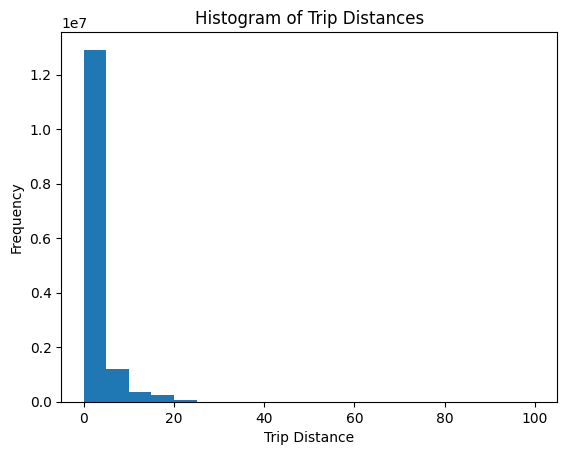

In [16]:
plt.hist(df['trip_distance'], bins=20)
plt.xlabel("Trip Distance")
plt.ylabel("Frequency")
plt.title("Histogram of Trip Distances")
plt.show()


In [17]:
distinct_values = df.nunique()
print("Distinct Values for Each Field:")
print(distinct_values)



Distinct Values for Each Field:
medallion               13426
hack_license            32224
vendor_id                   2
rate_code                  14
store_and_fwd_flag          2
pickup_datetime       2303465
dropoff_datetime      2305816
passenger_count            10
trip_time_in_secs        6594
trip_distance            4368
pickup_longitude        40442
pickup_latitude         64511
dropoff_longitude       56249
dropoff_latitude        88766
hour                       24
dtype: int64


In [18]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
min_max_values = df[numeric_columns].agg(['min', 'max'])
print("Minimum and Maximum Values for Numeric Fields (excluding lat and lon):")
print(min_max_values)


Minimum and Maximum Values for Numeric Fields (excluding lat and lon):
     rate_code  passenger_count  trip_time_in_secs  trip_distance  \
min          0                0                  0            0.0   
max        210              255              10800          100.0   

     pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
min       -2771.28540       -3547.9207         -2350.9556        -3547.9207   
max         112.40418        3310.3645          2228.7375         3477.1055   

     hour  
min     0  
max    23  


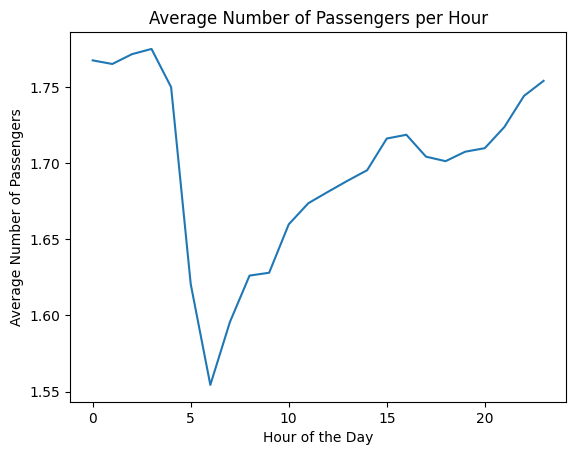

In [19]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['hour'] = df['pickup_datetime'].dt.hour
average_passengers_per_hour = df.groupby('hour')['passenger_count'].mean()
plt.plot(average_passengers_per_hour)
plt.xlabel("Hour of the Day")
plt.ylabel("Average Number of Passengers")
plt.title("Average Number of Passengers per Hour")
plt.show()


In [11]:
import pandas as pd


df = pd.read_csv("C:/Users/Tejashwini/Desktop/Taxi/trip_data_1.csv (1)/trip_data_1.csv")


In [19]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['hour'] = df['pickup_datetime'].dt.hour
average_passengers_per_hour = df.groupby('hour')['passenger_count'].mean()


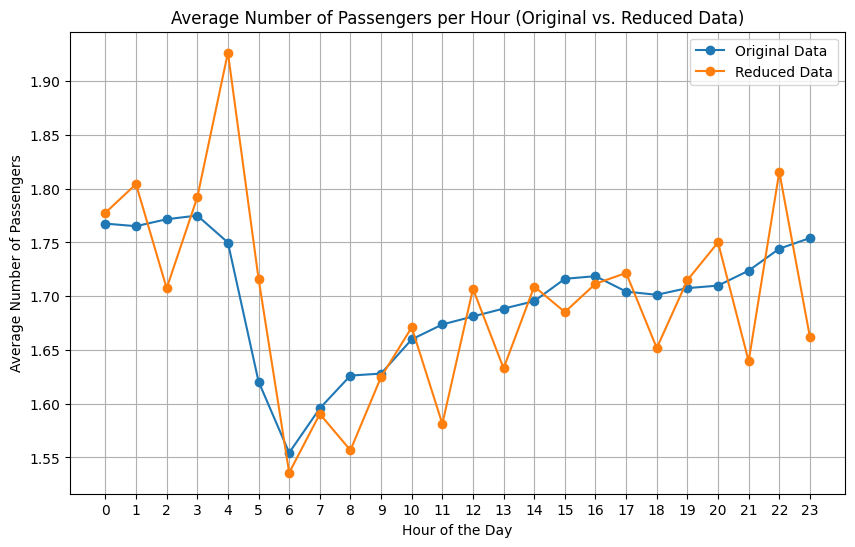

In [20]:
import matplotlib.pyplot as plt


reduced_df = pd.read_csv("reduced_trip_data.csv")


reduced_df['pickup_datetime'] = pd.to_datetime(reduced_df['pickup_datetime'])
reduced_df['hour'] = reduced_df['pickup_datetime'].dt.hour
average_passengers_per_hour_reduced = reduced_df.groupby('hour')['passenger_count'].mean()


plt.figure(figsize=(10, 6))


plt.plot(average_passengers_per_hour, label="Original Data", marker='o', linestyle='-')


plt.plot(average_passengers_per_hour_reduced, label="Reduced Data", marker='o', linestyle='-')

plt.xlabel("Hour of the Day")
plt.ylabel("Average Number of Passengers")
plt.title("Average Number of Passengers per Hour (Original vs. Reduced Data)")
plt.xticks(range(24))
plt.grid(True)
plt.legend()
plt.show()
